In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#import scipy
#from scipy.optimize import minimize
import numpy as np
import copy
import time
import imp
import pandas as pd

In [2]:
# ASSUMPTIONS:

# Copper plate: power can flow anywhere, i.e. power balance is the main metric
# power in = power out
# whatever the power imbalance is, it the power that will be requested by the substation

# PLOTS: 
# Network: currently this is a fake network that is not being used by anything.  It is for show only and may be 
# used once we start caring about AC/DC power flow
# Total power used and total power generated

# OUTPUT: total power requested or given by the substation

In [3]:
# ===============================================
# Step 1: graph topology
# ===============================================
print('Defining the network...')

# this will get the network for the 8500 - we can use this network once we feel comfortable going to bigger sizes
# filename = 'inputs/IEEE_8500_locations.csv'
# x,y = network.get_locations(filename, plot=True)

# start with a smaller system - start with the 37 bus system with a copper plate assumption
N = 37
np.random.seed(57) # -> to make sure that the randomness is always the same - helpful for debugging

# communication constants
comm_delay = 0.0050 # 5 ms per communication iteration

# length of time
Nt = 1440 # minutes in a day

Defining the network...


## Defining Generation and Load Nodes

In [4]:
# define the power used by each of the nodes - this is where you would put your human behavior decisions 
# for each of these nodes

power_used = np.zeros((N,Nt))              # keep track of power used by each node
power_used[:,0] = 100 * np.random.randn(N) # kW - starting power 

# Assume each node has solar and can generate power or consume power, if generated power, the power will be positive
# and if consuming power the power will be negative 

# TODO: we don't need to worry currently about control of solar 
# eventually we will want to add some controls to make the output at the substation near zero
for i in range(1,Nt):
    for j in range(N):
        # TODO: correlation with time of day 
        power_used[j,i] = power_used[j,i-1] + 1 * np.random.randn(1)   
        # change the power by a small amount for each minute 
        # Caity - this is where you would add your inputs
        

Text(0, 0.5, 'Power (kW)')

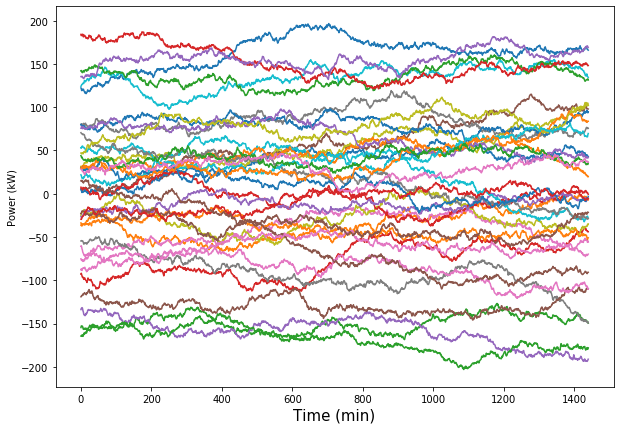

In [66]:
# plot the profiles of each of the nodes
plt.figure(figsize=(10,7))
for i in range(N):
    plt.plot(power_used[i,:])
    
plt.xlabel('Time (min)', fontsize=15)
plt.ylabel('Power (kW)')

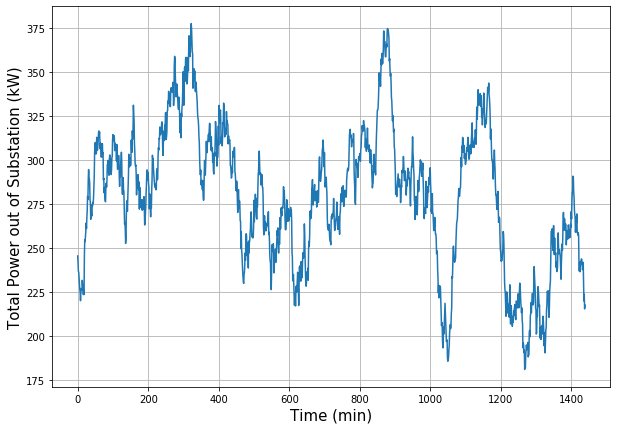

In [69]:
# plot the total power requested by the substation
plt.figure(figsize=(10,7))
plt.plot(np.sum(power_used,axis=0))
plt.xlabel('Time (min)', fontsize=15)
plt.ylabel('Total Power out of Substation (kW)', fontsize=15)
plt.grid()

## Visualizations

In [47]:
# def cluster(x, y, distance, method='radius', view_plot=False):
#     # 3 clustering techniques:
#     #     1. radius - agents within a radius
#     #     2. box - agents within a box
#     #     3. nearest - nearest agents

#     # number of turbines
#     nAgents = len(x)

#     # reference point
#     xMin = np.min(x)
#     yMin = np.min(y)

#     # initialize cluster dictionary
#     cluster_agents = dict()

#     if view_plot:
#         plt.figure(figsize=(10, 7))

#     for i in range(nAgents):
#         # print('Agent ', i, 'out of ', nAgents)
#         # plot the turbines to see the clustering
#         if view_plot:
#             plt.plot(x[i] - xMin, y[i] - yMin, 'ko', markersize=10)
#         cluster_agents[i] = []
#         if method == 'nearest':
#             dist = np.zeros(nAgents)
#         for j in range(nAgents):
#             if i != j:
#                 # ===============================================
#                 # cluster turbines within some radius
#                 # ===============================================
#                 if method == 'radius':
#                     dist = np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2 )
#                     if dist < distance[0]:
#                         if view_plot:
#                             plt.plot([x[i] - xMin, x[j] - xMin],
#                                      [y[i] - yMin, y[j] - yMin],
#                                      color=plt.cm.RdYlBu(i))
#                         cluster_agents[i].append(j)
#                 # ===============================================
#                 # cluster turbines within some box boundaries
#                 # ===============================================
#                 elif method == 'box':
#                     dist_east = abs(x[i] - x[j])
#                     dist_north = abs(y[i] - y[j])
#                     if dist_east < distance[0] and dist_north < distance[1]:
#                         if view_plot:
#                             plt.plot([x[i] - xMin, x[j]] - xMin,
#                                      [y[i] - yMin, y[j] - yMin],
#                                      color=plt.cm.RdYlBu(i))

#                         cluster_agents[i].append(j)
#                 # ===============================================
#                 # cluster nearest turbines
#                 # ===============================================
#                 elif method == 'nearest':
#                     dist[j] = np.sqrt((x[i] - x[j]) ** 2 \
#                                       + (y[i] - y[j]) ** 2)

#         # nearest neighbor has a different plotting strategy
#         if method == 'nearest':
#             idx = np.argsort(dist)
#             cluster_agents[i] = idx[0:distance[0] + 1]
#             for k in cluster_agents[i]:
#                 if view_plot:
#                     plt.plot([x[i] - xMin, x[k] - xMin], \
#                              [y[i] - yMin, y[k] - yMin],
#                              color=plt.cm.RdYlBu(i))

#     if view_plot:
#         plt.title('Clustering', fontsize=25)
#         plt.xlabel('x (m)', fontsize=25)
#         plt.ylabel('y (m)', fontsize=25)
#         plt.tick_params(which='both', labelsize=25)
#         plt.grid()

#     return cluster_agents

In [50]:
# def plot_distributed(x, y, cluster_agents):

#     # number of turbines
#     nAgents = len(x)

#     # reference point
#     xMin = np.min(x)
#     yMin = np.min(y)

#     xMax = np.max(x)
#     yMax = np.max(y)

#     plt.plot(x-xMin,y-yMin,'ko')
#     for i in range(nAgents):
#         for j in cluster_agents[i]:
#             scale_factor = 1.0
#             plt.plot([x[i],x[j]]-xMin,[y[i],y[j]]-yMin,color='g')

#     plt.xlim([xMin - 10, xMax+10])
#     plt.ylim([yMin - 10, yMax + 10])

In [51]:
# # Show power at each nodes - for t = 0 

# x = 10*np.random.rand(N)
# y = 10*np.random.rand(N)

# # connect to nearest turbines
# cluster_turbines = cluster(x,y,np.ones(N))

# # plot the network
# # plot_distributed(x,y,cluster_turbines)
# plt.plot(x,y,marker_size=power_used[:,0])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fdb9593f5f0> (for post_execute):


KeyboardInterrupt: 